<a href="https://colab.research.google.com/github/Shreya111111/Insurance_Claim/blob/main/Insurance_Claim.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from google.colab import files
import io
data = files.upload()

Saving exp4.csv to exp4.csv


In [5]:
!pip install ydata-profiling



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 357.3/357.3 kB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 12.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 10.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 kB 17.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 17.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 27.2 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=39da6b0503cf793e4ec6cbe2600ab73ba1ba19c310eb92b66d44a12d61990f77
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin
  Attempting uninstall: pydantic
    Found existing installation: pydantic 2.2.1
    Uninstalling pydantic-2.2.1:
      Successfully uninstalled pydantic-2.2.1


In [6]:
!pip install pywaffle


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.3/25.3 MB 39.9 MB/s eta 0:00:00


In [7]:
!pip install highlight_text


In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import warnings
import os
import yellowbrick
import joblib
from ydata_profiling import ProfileReport
from pywaffle import Waffle
from statsmodels.graphics.gofplots import qqplot
from PIL import Image
from highlight_text import fig_text

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import RobustScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.metrics import classification_report, accuracy_score
from yellowbrick.classifier import PrecisionRecallCurve, ROCAUC, ConfusionMatrix
from yellowbrick.model_selection import LearningCurve, FeatureImportances
from yellowbrick.contrib.wrapper import wrap
from yellowbrick.style import set_palette

In [9]:
df= pd.read_csv(io.StringIO(data['exp4.csv'].decode('utf-8')))

In [10]:
class Color:
    # ANSI escape codes for text colors
    RED = '\033[91m'
    GREEN = '\033[92m'
    YELLOW = '\033[93m'
    BLUE = '\033[94m'
    END = '\033[0m'  # Reset text attributes to default

clr = Color()

In [11]:
import pygame

pygame 2.5.1 (SDL 2.28.2, Python 3.10.12)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [12]:

df.head().style.background_gradient(cmap='Reds').hide_index()

<ipython-input-12-22fadcfb658c>:1: FutureWarning: this method is deprecated in favour of `Styler.hide(axis="index")`
  df.head().style.background_gradient(cmap='Reds').hide_index()


age,cause,time,track_record,claim
elder,severe,intermediate,good,yes
elder,moderate,intermediate,good,yes
adult,moderate,late,good,yes
young,low,on-time,fair,no
young,severe,on-time,good,yes


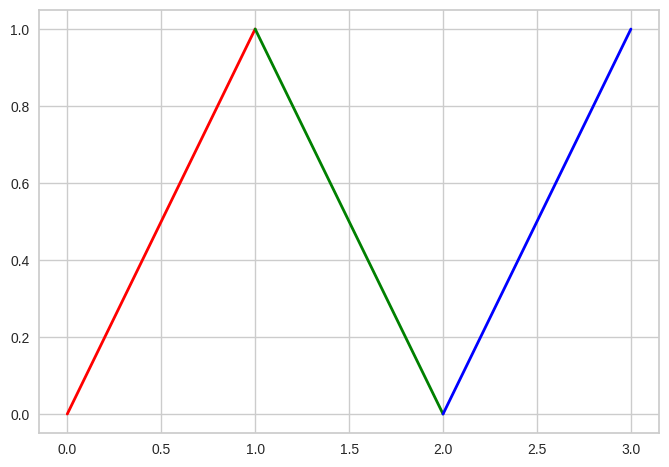

In [13]:
import matplotlib.pyplot as plt

def color_line(ax, x, y, colors, linewidth=2):
    for i in range(len(x) - 1):
        ax.plot(x[i:i+2], y[i:i+2], color=colors[i], linewidth=linewidth)

# Example data
x_values = [0, 1, 2, 3]
y_values = [0, 1, 0, 1]
line_colors = ['red', 'green', 'blue']

# Create a plot
fig, ax = plt.subplots()

# Use the color_line function to plot colored lines
color_line(ax, x_values, y_values, line_colors)

# Show the plot
plt.show()


In [14]:
ProfileReport(df, title='Insurance Report', minimal=True, progress_bar=False, samples=None, correlations=None, interactions=None, explorative=True, dark_mode=True, notebook={'iframe':{'height': '600px'}}, html={'style':{'primary_color': color_line}}, missing_diagrams={'heatmap': False, 'dendrogram': False}).to_notebook_iframe()

<ipython-input-55-4f00dcf4a795>:10: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  mask = np.triu(np.ones_like(df.corr(), dtype=bool))
<ipython-input-55-4f00dcf4a795>:12: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), mask=mask, annot=True, cmap=color_map, linewidths=0.2, cbar=False, annot_kws={"size": 7}, rasterized=True)


ValueError: ignored

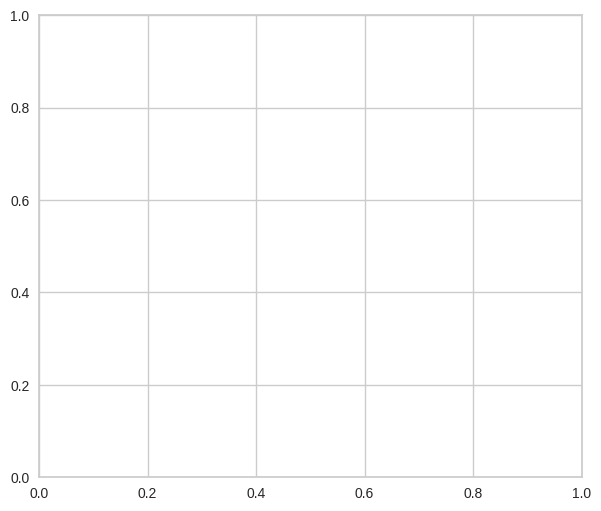

In [55]:
# --- Correlation Map Variables ---
suptitle = dict(x=0.1, y=1.01, fontsize=13, weight='heavy', ha='left', va='bottom')
title = dict(x=0.1, y=0.98, fontsize=8, weight='normal', ha='left', va='bottom')
xy_label = dict(size=6)
#highlight_textprops = [{'weight':'bold', 'color': colors[0]}, {'weight':'bold', 'color': colors[2]}]
color_map = {"red": (255, 0, 0), "green": (0, 255, 0), "blue": (0, 0, 255)}
#from mymodule import color_map

# --- Correlation Map (Heatmap) ---
mask = np.triu(np.ones_like(df.corr(), dtype=bool))
fig, ax = plt.subplots(figsize=(7, 6))
sns.heatmap(df.corr(), mask=mask, annot=True, cmap=color_map, linewidths=0.2, cbar=False, annot_kws={"size": 7}, rasterized=True)
yticks, ylabels = plt.yticks()
xticks, xlabels = plt.xticks()
ax.set_xticklabels(xlabels, rotation=0, **xy_label)
ax.set_yticklabels(ylabels, **xy_label)
ax.grid(False)
fig_text(s='Numerical Variables Correlation Map', **suptitle)
fig_text(s='DATA ANALYSIS', highlight_textprops=highlight_textprops, **title)
plt.tight_layout(rect=[0, 0.04, 1, 1.01])
plt.gcf().text(0.85, 0.03, 'kaggle.com/caesarmario', style='italic', fontsize=5)
plt.show();

In [53]:
epsilon = 1e-9
class NaiveBayes:
    def fit(self, X, y):
      self.classes = np.unique(y)
      self.prior = np.zeros(len(self.classes))
      self.mean = np.zeros((len(self.classes), X.shape[1]))
      self.var = np.zeros((len(self.classes), X.shape[1]))

      n_samples, n_features = X.shape
      for i, c in enumerate(self.classes):
          X_c = X[y == c]
          n_samples_c = X_c.shape[0]
          if n_samples_c > 0:
            self.mean[i, :] = X_c.mean(axis=0)
            self.var[i, :] = X_c.var(axis=0) + epsilon  # Add epsilon for variance
            self.prior[i] = (n_samples_c + 1) / (n_samples + len(self.classes))  # Laplace smoothing

    def predict(self, X):
        y_pred = [self.prediction(x) for x in X]
        return np.array(y_pred)

    def prediction(self, x):
        posteriors = []
        for i, c in enumerate(self.classes):
            prior = np.log(self.prior[i])
            class_conditional = np.sum(np.log(self.pdf(i, x)))
            posterior = prior + class_conditional
            posteriors.append(posterior)
        return self.classes[np.argmax(posteriors)]

    def pdf(self, class_idx, x):
        mean = self.mean[class_idx]
        var = self.var[class_idx]

    # Convert 'x', 'mean', and 'var' to float64 type
        x = np.asarray(x, dtype=np.float64)
        mean = np.asarray(mean, dtype=np.float64)
        var = np.asarray(var, dtype=np.float64)

        numerator = np.exp(-((x - mean) ** 2) / (2 * var))
        denominator = np.sqrt(2 * np.pi * var) + epsilon
        return numerator / denominator



    def accuracy(self, y_true, y_pred):
        accuracy = np.sum(y_true == y_pred) / len(y_true)
        return accuracy



In [17]:
df.head()

,age,cause,time,track_record,claim
0,elder,severe,intermediate,good,yes
1,elder,moderate,intermediate,good,yes
2,adult,moderate,late,good,yes
3,young,low,on-time,fair,no
4,young,severe,on-time,good,yes


In [60]:
df.tail()

,age,cause,time,track_record,claim
495,elder,severe,late,good,no
496,adult,low,on-time,bad,no
497,elder,low,on-time,good,no
498,young,low,late,fair,no
499,adult,moderate,intermediate,fair,yes


In [61]:
df.describe()

,age,cause,time,track_record,claim
count,500,500,500,500,500
unique,3,3,3,3,3
top,adult,severe,intermediate,good,no
freq,206,212,257,248,250


In [62]:
df.info

<bound method DataFrame.info of       age     cause          time  track_record claim
0    elder    severe  intermediate         good   yes
1    elder  moderate  intermediate         good   yes
2    adult  moderate          late         good   yes
3    young       low       on-time         fair    no
4    young    severe       on-time         good   yes
..     ...       ...           ...          ...   ...
495  elder    severe          late         good    no
496  adult       low       on-time          bad    no
497  elder       low       on-time         good    no
498  young       low          late         fair    no
499  adult  moderate  intermediate         fair   yes

[500 rows x 5 columns]>

In [22]:
X = df.drop(['claim'], axis=1)
y = df['claim']

# --- Splitting Dataset ---
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
from sklearn.preprocessing import MinMaxScaler, LabelEncoder


Using SVM

In [37]:
label_encoder = LabelEncoder()

# Convert categorical columns to numerical values
X_encoded = X.copy()
for column in X.columns:
    X_encoded[column] = label_encoder.fit_transform(X[column])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.3, random_state=123)

# Initialize the SVM classifier
clf = SVC()

# Train the classifier on the training data
clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = clf.predict(X_test)
print("\nTraining set size: ", len(X_train))
print("Test set size: ", len(X_test))
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy*100)

# Generate classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)


Training set size:  350
Test set size:  150
Accuracy: 95.33333333333334
Classification Report:
               precision    recall  f1-score   support

          no       0.93      0.97      0.95        72
         yes       0.97      0.94      0.95        78

    accuracy                           0.95       150
   macro avg       0.95      0.95      0.95       150
weighted avg       0.95      0.95      0.95       150



In [39]:
print(X_encoded)

     age   cause   time   track_record
0       1       2      0             2
1       1       1      0             2
2       0       1      1             2
3       2       0      2             1
4       2       2      2             2
..    ...     ...    ...           ...
495     1       2      1             2
496     0       0      2             0
497     1       0      2             2
498     2       0      1             1
499     0       1      0             1

[500 rows x 4 columns]


In [48]:
print(y)

0      yes
1      yes
2      yes
3       no
4      yes
      ... 
495     no
496     no
497     no
498     no
499    yes
Name: claim, Length: 500, dtype: object


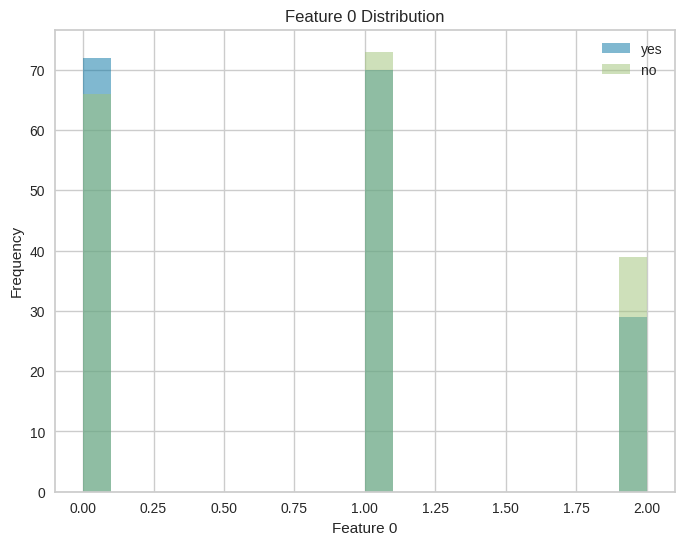

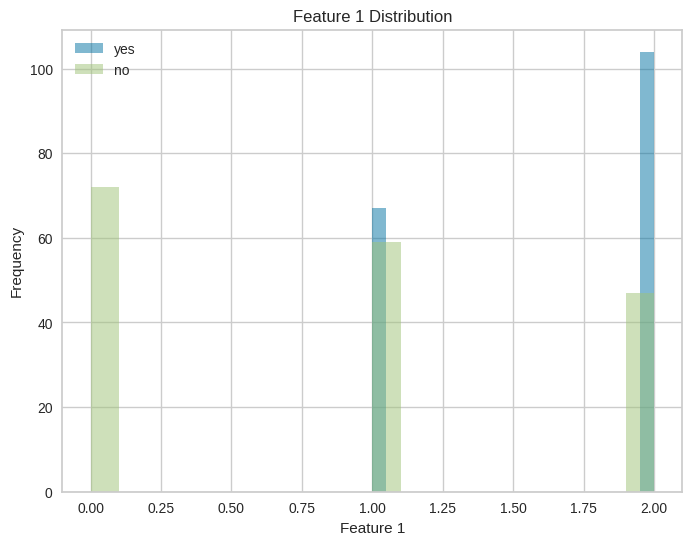

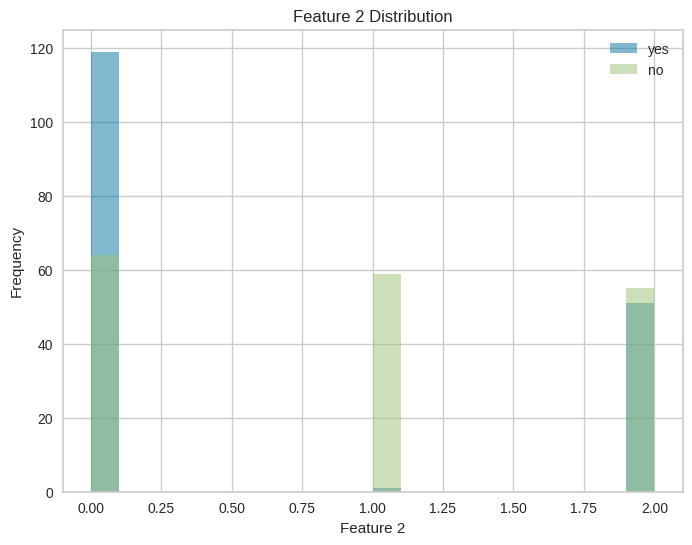

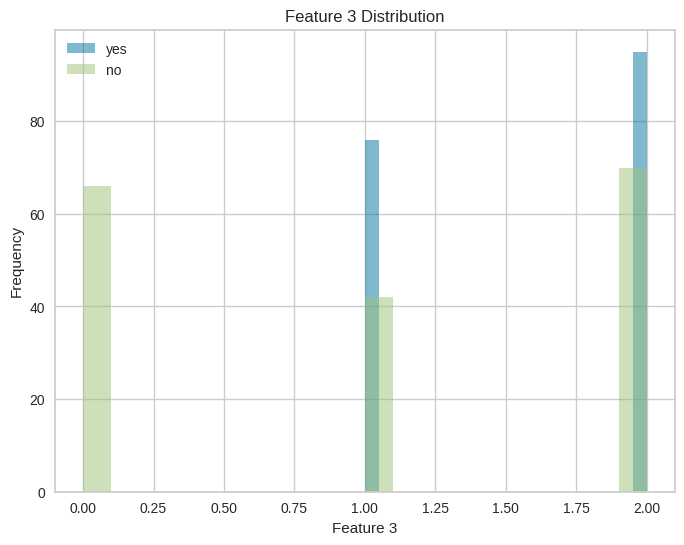

In [56]:
import matplotlib.pyplot as plt

# Assuming X_train is your feature matrix and y_train are the corresponding labels
for feature_idx in range(X_train.shape[1]):
    plt.figure(figsize=(8, 6))
    plt.hist(X_train[y_train == 'yes', feature_idx], alpha=0.5, label='yes', bins=20)
    plt.hist(X_train[y_train == 'no', feature_idx], alpha=0.5, label='no', bins=20)
    plt.title(f"Feature {feature_idx} Distribution")
    plt.xlabel(f"Feature {feature_idx}")
    plt.ylabel("Frequency")
    plt.legend()
    plt.show()


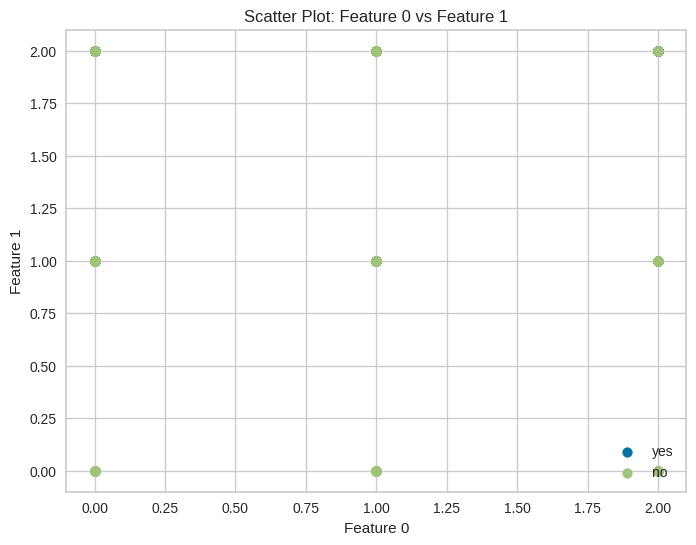

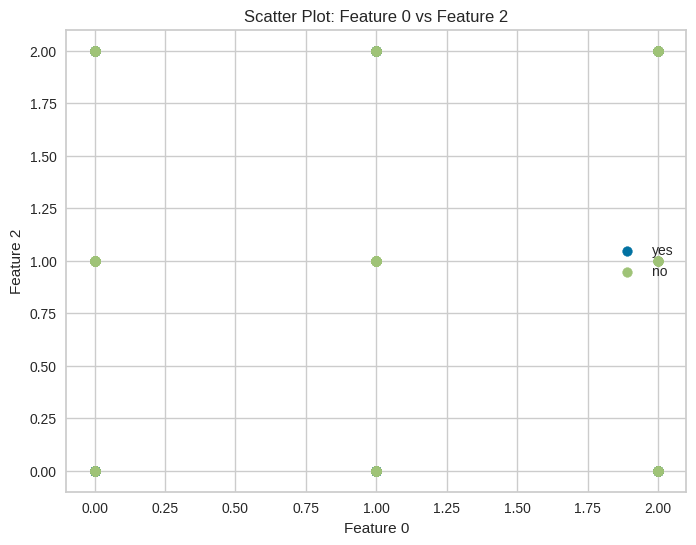

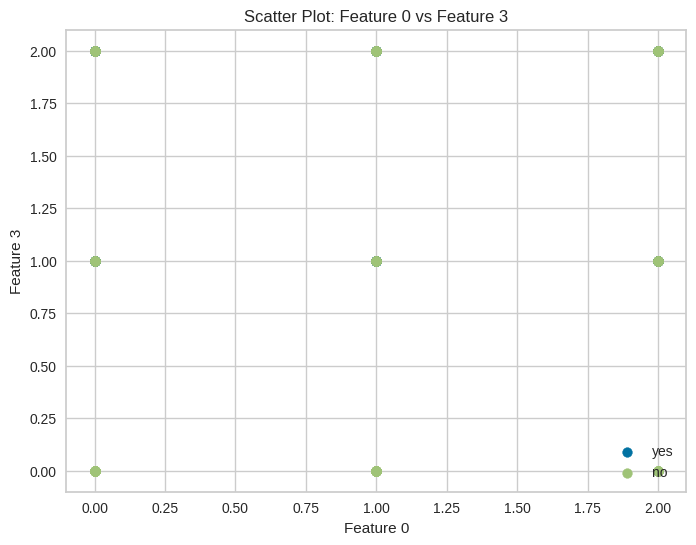

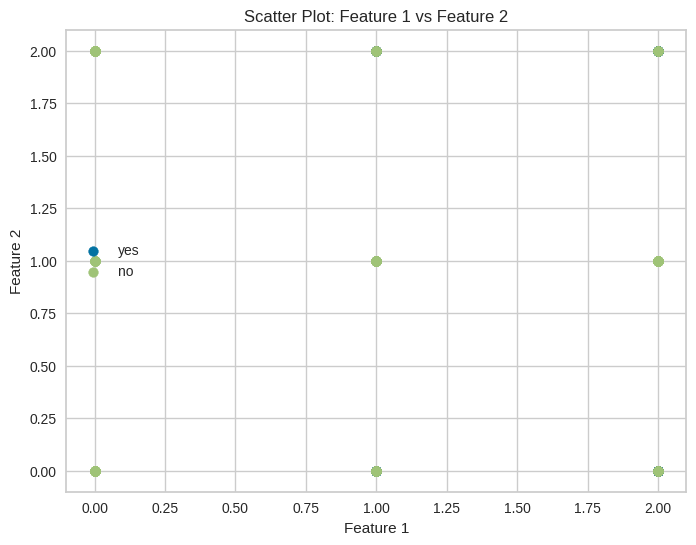

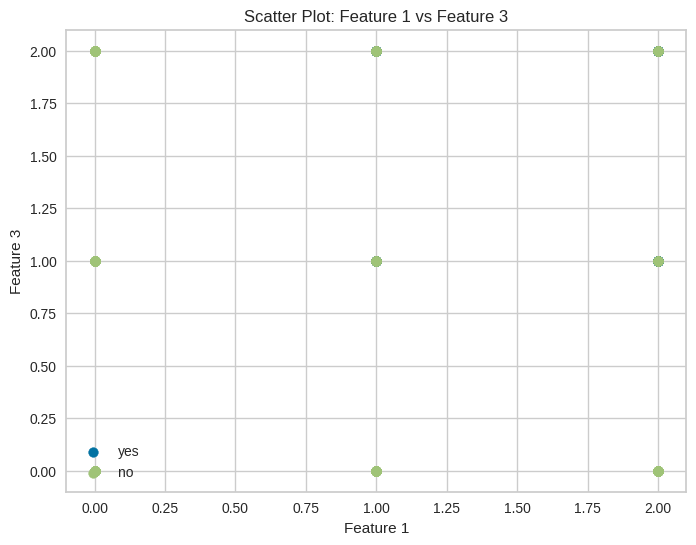

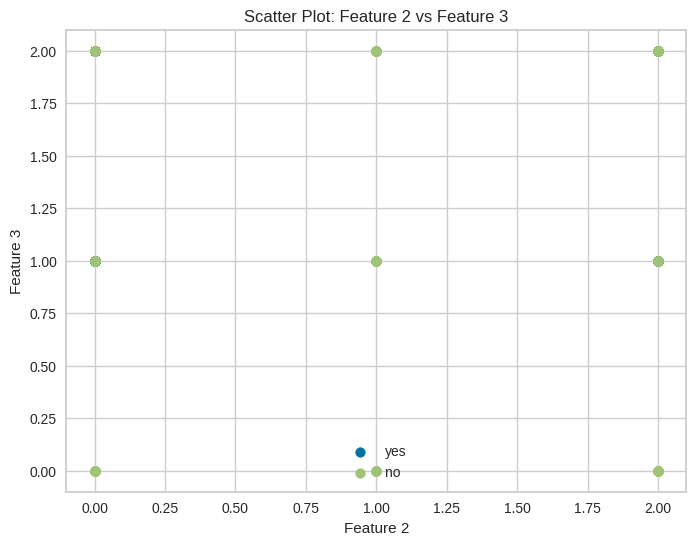

In [57]:
# Assuming X_train is your feature matrix and y_train are the corresponding labels
for feature1 in range(X_train.shape[1]):
    for feature2 in range(feature1 + 1, X_train.shape[1]):
        plt.figure(figsize=(8, 6))
        plt.scatter(X_train[y_train == 'yes', feature1], X_train[y_train == 'yes', feature2], label='yes')
        plt.scatter(X_train[y_train == 'no', feature1], X_train[y_train == 'no', feature2], label='no')
        plt.title(f"Scatter Plot: Feature {feature1} vs Feature {feature2}")
        plt.xlabel(f"Feature {feature1}")
        plt.ylabel(f"Feature {feature2}")
        plt.legend()
        plt.show()


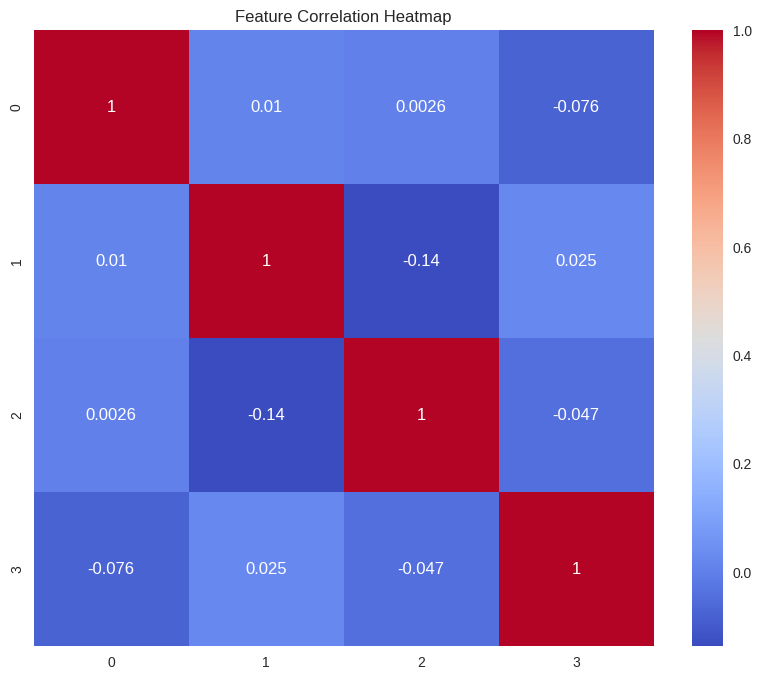

In [59]:
import seaborn as sns

correlation_matrix = np.corrcoef(X_train, rowvar=False)
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()


Using Naive Bayes

In [54]:
# Assuming you have X_train, X_test, y_train, and y_test

# Instantiate the NaiveBayes class
nb = NaiveBayes()

# Train the model
nb.fit(X_train, y_train)

# Predict labels for the test data
predictions = nb.predict(X_test)

# Calculate accuracy
accuracy = nb.accuracy(y_test, predictions)

print("Naive Bayes classification accuracy: {:.2f}%".format(accuracy * 100))


Naive Bayes classification accuracy: 76.67%


<ipython-input-53-8e8c3308da70>:26: RuntimeWarning: divide by zero encountered in log
  class_conditional = np.sum(np.log(self.pdf(i, x)))
